In [4]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

In [5]:
iris = load_iris()
x = iris.data
y = iris.target 
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

/opt/conda/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.113s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.387672
[t-SNE] KL divergence after 1000 iterations: 0.129141


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

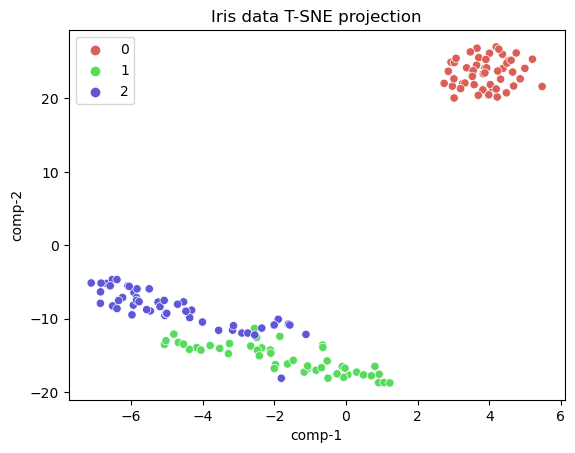

In [6]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection") 

In [22]:
import torch
embeds_adv = torch.load("test_embeds/embeds_adv_epsilon_0.0314_alpha_0.00314_min_val_0.0_max_val_1.0_max_iters_20_type_linf_randomstart_True_dct_False_ckpt.t7training_1_1000_no_finetune_Evaluate_linear_eval_ResNet18_cifar-10_0.pt")
embeds_ori = torch.load("test_embeds/embeds_ori_epsilon_0.0314_alpha_0.00314_min_val_0.0_max_val_1.0_max_iters_20_type_linf_randomstart_True_dct_False_ckpt.t7training_1_1000_no_finetune_Evaluate_linear_eval_ResNet18_cifar-10_0.pt")
embeds = torch.cat((embeds_ori, embeds_adv))
embeds.shape

torch.Size([20000, 512])

In [23]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(embeds.detach().cpu().numpy())

/opt/conda/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.012s...
[t-SNE] Computed neighbors for 20000 samples in 10.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

In [33]:
import numpy as np
n = 8
z_ = np.concatenate((z[:n], z[10000:10000+n]))
z_.shape

(16, 2)

/tmp/ipykernel_4357/3434335654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"][n:] = 1
/tmp/ipykernel_4357/3434335654.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, 'CIFAR-10 data T-SNE projection')]

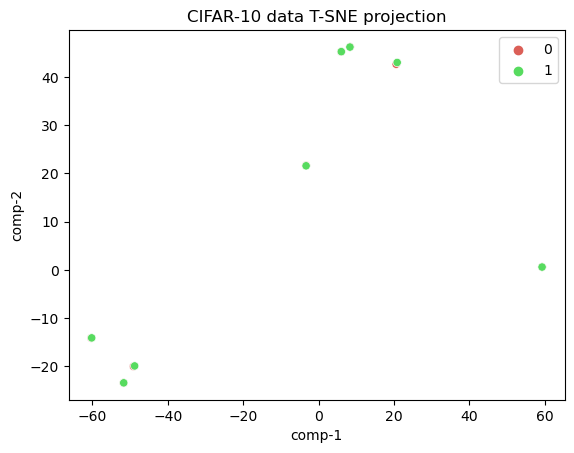

In [34]:
import matplotlib.pyplot as plt
df = pd.DataFrame()
df["comp-1"] = z_[:,0]
df["comp-2"] = z_[:,1]
df["y"] = 0
df["y"][n:] = 1
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="CIFAR-10 data T-SNE projection") 
# plt.ylim(10, 40)

In [35]:
df

,comp-1,comp-2,y
0,-3.305260,21.654148,0
1,-51.735561,-23.418219,0
2,-49.116985,-19.993050,0
3,-60.333405,-14.117641,0
4,20.605000,42.608452,0
5,59.337166,0.609540,0
6,5.996870,45.202938,0
7,8.381142,46.201283,0
8,-3.301481,21.562523,1
9,-51.703747,-23.404139,1


In [27]:
df.shape

(20000, 3)

In [36]:
import torch
embeds_adv = torch.load("test_embeds/embeds_adv_epsilon_0.0314_alpha_0.00314_min_val_0.0_max_val_1.0_max_iters_20_type_linf_randomstart_True_dct_False_ckpt.t7rocl_no_finetune_Evaluate_linear_eval_ResNet18_cifar-10_0.pt")
embeds_ori = torch.load("test_embeds/embeds_ori_epsilon_0.0314_alpha_0.00314_min_val_0.0_max_val_1.0_max_iters_20_type_linf_randomstart_True_dct_False_ckpt.t7rocl_no_finetune_Evaluate_linear_eval_ResNet18_cifar-10_0.pt")
embeds = torch.cat((embeds_ori, embeds_adv))
embeds.shape

torch.Size([20000, 512])

In [37]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(embeds.detach().cpu().numpy())

/opt/conda/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.009s...
[t-SNE] Computed neighbors for 20000 samples in 10.893s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

In [38]:
import numpy as np
n = 8
z_ = np.concatenate((z[:n], z[10000:10000+n]))
z_.shape

(16, 2)

/tmp/ipykernel_4357/3434335654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"][n:] = 1
/tmp/ipykernel_4357/3434335654.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, 'CIFAR-10 data T-SNE projection')]

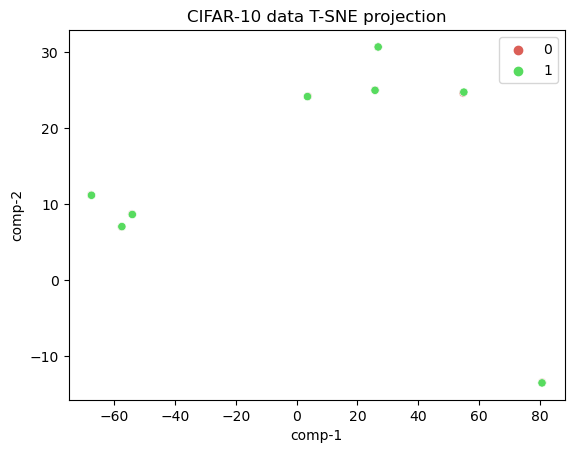

In [39]:
import matplotlib.pyplot as plt
df = pd.DataFrame()
df["comp-1"] = z_[:,0]
df["comp-2"] = z_[:,1]
df["y"] = 0
df["y"][n:] = 1
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="CIFAR-10 data T-SNE projection") 
# plt.ylim(10, 40)